# Seaborn HW#3 Joon Jung

1. Read in and Merge the data

In [ ]:
import pandas as pd

# Read the tsv file into a pandas DataFrame
df_cali = pd.read_csv('california_counties.tsv', sep='\t')
df_covid = pd.read_csv('covid_surge_offsets.tsv', sep='\t')

df_cali.head()

,Unnamed: 0,fips,name,seat,established,established_from,general_law_or_charter,population_2020,area_sq_miles
0,0,1,Alameda,Oakland,1853,Contra Costa and Santa Clara,Charter,1682353,738
1,1,3,Alpine,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",General Law,1204,739
2,2,5,Amador,Jackson,1854,Calaveras,General Law,40474,606
3,3,7,Butte,Oroville,1850,'''''original''''',Charter,211632,1640
4,4,9,Calaveras,San Andreas,1850,'''''original''''',General Law,45292,1020


In [ ]:
df_covid.head()

,Unnamed: 0,area,surge_1_offset,surge_2_offset,surge_3_offset,surge_4_offset
0,0,Alameda,165.0,342.0,559.0,707.0
1,1,Alpine,46.0,278.0,584.0,703.0
2,2,Amador,187.0,307.0,552.0,711.0
3,3,Butte,209.0,338.0,590.0,711.0
4,4,Calaveras,211.0,342.0,568.0,712.0


In [ ]:
df_cali.merge(df_covid, left_on='name', right_on='area')

df_cali.head()

,Unnamed: 0,fips,name,seat,established,established_from,general_law_or_charter,population_2020,area_sq_miles
0,0,1,Alameda,Oakland,1853,Contra Costa and Santa Clara,Charter,1682353,738
1,1,3,Alpine,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",General Law,1204,739
2,2,5,Amador,Jackson,1854,Calaveras,General Law,40474,606
3,3,7,Butte,Oroville,1850,'''''original''''',Charter,211632,1640
4,4,9,Calaveras,San Andreas,1850,'''''original''''',General Law,45292,1020


In [ ]:
df_merge = pd.merge(df_covid, df_cali, left_on='area', right_on='name')
df_merge.head()

,Unnamed: 0_x,area,surge_1_offset,surge_2_offset,surge_3_offset,surge_4_offset,Unnamed: 0_y,fips,name,seat,established,established_from,general_law_or_charter,population_2020,area_sq_miles
0,0,Alameda,165.0,342.0,559.0,707.0,0,1,Alameda,Oakland,1853,Contra Costa and Santa Clara,Charter,1682353,738
1,1,Alpine,46.0,278.0,584.0,703.0,1,3,Alpine,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",General Law,1204,739
2,2,Amador,187.0,307.0,552.0,711.0,2,5,Amador,Jackson,1854,Calaveras,General Law,40474,606
3,3,Butte,209.0,338.0,590.0,711.0,3,7,Butte,Oroville,1850,'''''original''''',Charter,211632,1640
4,4,Calaveras,211.0,342.0,568.0,712.0,4,9,Calaveras,San Andreas,1850,'''''original''''',General Law,45292,1020


I don't think it is required, but I am going to drop the "name" column, because I don't like that I have two identical column "area" and "name".

In [ ]:
df_merge = df_merge.drop(columns=['name'])
df_merge.head()

,Unnamed: 0_x,area,surge_1_offset,surge_2_offset,surge_3_offset,surge_4_offset,Unnamed: 0_y,fips,seat,established,established_from,general_law_or_charter,population_2020,area_sq_miles
0,0,Alameda,165.0,342.0,559.0,707.0,0,1,Oakland,1853,Contra Costa and Santa Clara,Charter,1682353,738
1,1,Alpine,46.0,278.0,584.0,703.0,1,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",General Law,1204,739
2,2,Amador,187.0,307.0,552.0,711.0,2,5,Jackson,1854,Calaveras,General Law,40474,606
3,3,Butte,209.0,338.0,590.0,711.0,3,7,Oroville,1850,'''''original''''',Charter,211632,1640
4,4,Calaveras,211.0,342.0,568.0,712.0,4,9,San Andreas,1850,'''''original''''',General Law,45292,1020


In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0_x            58 non-null     int64  
 1   area                    58 non-null     object 
 2   surge_1_offset          58 non-null     float64
 3   surge_2_offset          58 non-null     float64
 4   surge_3_offset          58 non-null     float64
 5   surge_4_offset          58 non-null     float64
 6   Unnamed: 0_y            58 non-null     int64  
 7   fips                    58 non-null     int64  
 8   seat                    58 non-null     object 
 9   established             58 non-null     int64  
 10  established_from        58 non-null     object 
 11  general_law_or_charter  58 non-null     object 
 12  population_2020         58 non-null     int64  
 13  area_sq_miles           58 non-null     int64  
dtypes: float64(4), int64(6), object(4)
memory us

2. Add a population density column

We just have to divde the population of each county by its area in square miles. We have a column called population_2020 and area_sq_miles.

In [ ]:
df_merge['population_density']= df_merge['population_2020']/df_merge['area_sq_miles']
df_merge.head()

,Unnamed: 0_x,area,surge_1_offset,surge_2_offset,surge_3_offset,surge_4_offset,Unnamed: 0_y,fips,seat,established,established_from,general_law_or_charter,population_2020,area_sq_miles,population_density
0,0,Alameda,165.0,342.0,559.0,707.0,0,1,Oakland,1853,Contra Costa and Santa Clara,Charter,1682353,738,2279.611111
1,1,Alpine,46.0,278.0,584.0,703.0,1,3,Markleeville,1864,"Amador, El Dorado, Calaveras, Mono and Tuolumne",General Law,1204,739,1.629229
2,2,Amador,187.0,307.0,552.0,711.0,2,5,Jackson,1854,Calaveras,General Law,40474,606,66.788779
3,3,Butte,209.0,338.0,590.0,711.0,3,7,Oroville,1850,'''''original''''',Charter,211632,1640,129.043902
4,4,Calaveras,211.0,342.0,568.0,712.0,4,9,San Andreas,1850,'''''original''''',General Law,45292,1020,44.403922


3. Create a scatterplot with seaborn

Plot surge_4_offset against the population density. It's informative to use different symbols for the counties that based on their "general_law_or_charter" characteristic.

Also, use a log scale in the population_density direction to make the correlation clearer.

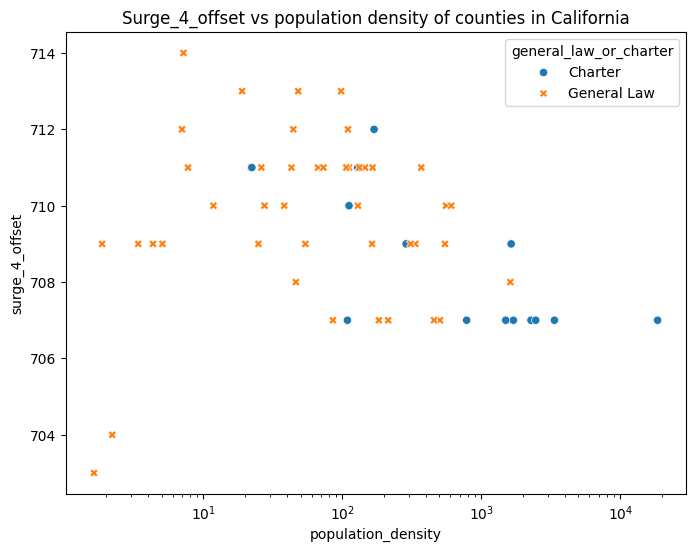

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

sns.scatterplot(data=df_merge, x='population_density', y='surge_4_offset', hue='general_law_or_charter', style='general_law_or_charter')
# by setting both hue and style to column 'general_law_or_charter, we can change both color and shape. I thought it might be better visualization for distinguishing

plt.xscale('log') #log scale, I looked to see if there is function in Seaborn to set log scale, but seemed like I have to bring in plt
plt.title('Surge_4_offset vs population density of counties in California')

plt.show()
